
# 09. Etapas de un proyecto Deep Learning
[**Python Deep Learning** Introducción práctica con Keras y TensorFlow 2. Jordi Torres. Editorial Marcombo ISBN: 9788426728289 ](https://www.marcombo.com/python-deep-learning-9788426728289/)


In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

## Descarga dataset Auto MPG

In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',   'Acceleration', 'Model Year', 'Origin'] 

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

In [5]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [6]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [8]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## Separar los datos para entrenar y test

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [0]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [11]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [0]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

## Desarrollar el modelo

In [0]:
# ULL! Canviar de llista a .add()
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu',
                 input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
  return model

model = build_model()


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [0]:
optimizer = tf.keras.optimizers.RMSprop(0.001)

In [0]:
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

##entrenamiento del modelo

In [17]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Train on 251 samples, validate on 63 samples
Epoch 1/1000
251/251 [==============================] - 1s 3ms/sample - loss: 554.0268 - mae: 22.2723 - mse: 554.0269 - val_loss: 536.6461 - val_mae: 21.8698 - val_mse: 536.6461
Epoch 2/1000
251/251 [==============================] - 0s 145us/sample - loss: 496.5240 - mae: 21.0030 - mse: 496.5240 - val_loss: 474.7017 - val_mae: 20.4741 - val_mse: 474.7016
Epoch 3/1000
251/251 [==============================] - 0s 137us/sample - loss: 438.5456 - mae: 19.6473 - mse: 438.5456 - val_loss: 408.0192 - val_mae: 18.8656 - val_mse: 408.0192
Epoch 4/1000
251/251 [==============================] - 0s 144us/sample - loss: 374.3632 - mae: 18.0506 - mse: 374.3632 - val_loss: 334.7384 - val_mae: 16.9448 - val_mse: 334.7384
Epoch 5/1000
251/251 [==============================] - 0s 139us/sample - loss: 304.4670 - mae: 16.1581 - mse: 304.4670 - val_loss: 259.0270 - val_mae: 14.7249 - val_mse: 259.0270
Epoch 6/1000
251/251 [==============================] - 0

## Evaluación el modelo

In [18]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.612458,1.052235,2.612458,6.759988,2.058468,6.759988,995
996,2.611689,0.987882,2.611689,6.719792,2.063948,6.719791,996
997,2.553481,1.028138,2.553481,6.859209,2.102868,6.859209,997
998,2.564960,1.035566,2.564960,6.893959,2.113281,6.893960,998
999,2.637798,1.025617,2.637797,6.918227,2.079524,6.918226,999


In [0]:
def plot_history(history):     
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

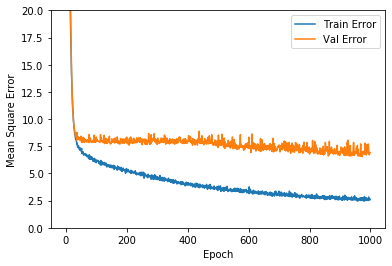

In [20]:
plot_history(history)

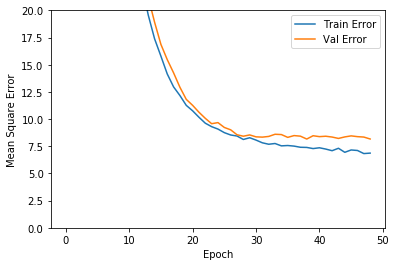

In [23]:
model = build_model()
model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0,
                    callbacks=[early_stop] )


plot_history(history)

In [0]:
model = build_model()

model.compile(loss='mse',optimizer=optimizer,metrics=['mse','mae'])


In [0]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0,
                    callbacks=[early_stop] )

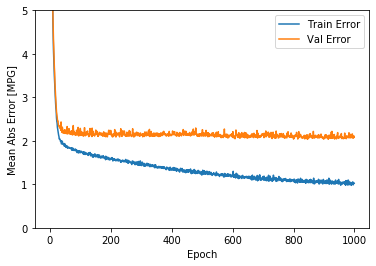

In [29]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'],
         label='Train Error')   
plt.plot(hist['epoch'], hist['val_mae'],
         label = 'Val Error')
plt.ylim([0,5])
plt.legend()
plt.show()

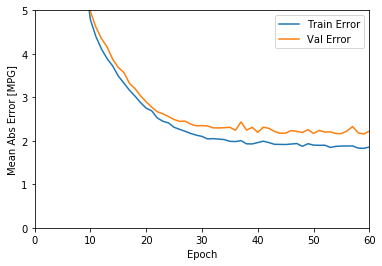

In [30]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('Mean Abs Error [MPG]')
plt.plot(hist['epoch'], hist['mae'],
         label='Train Error')   
plt.plot(hist['epoch'], hist['val_mae'],
         label = 'Val Error')
plt.ylim([0,5])
plt.xlim([0,60])
plt.legend()
plt.show()

In [31]:
loss, mse, mae = model.evaluate(normed_test_data, test_labels, verbose=1)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean Sqr Error: {:5.2f} MPG".format(mse))

78/78 [==============================] - 0s 156us/sample - loss: 6.1147 - mse: 6.1147 - mae: 1.9511
Testing set Mean Abs Error:  1.95 MPG
Testing set Mean Sqr Error:  6.11 MPG


## Predicciones con el modelo

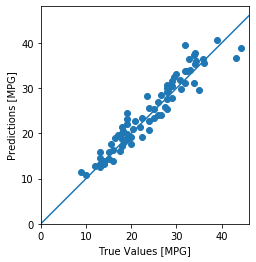

In [32]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square') 
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

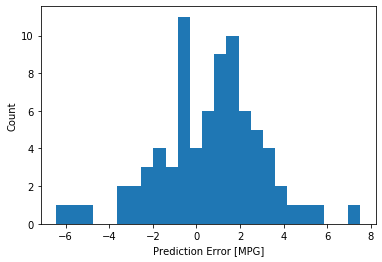

In [33]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

===========================================


In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.summary()

In [0]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.summary()

In [0]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

In [0]:
from keras.utils import to_categorical

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print (train_images.shape)
print (train_labels.shape)
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print (train_images.shape)
print (train_labels.shape)


In [0]:

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          batch_size=100,
          epochs=5,
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

## Datos Fashion-MNIST

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
c
test_images = test_images.astype('float32') / 255

In [0]:

model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [0]:
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

In [0]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)     
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [0]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


In [0]:
#cal canviar l'especificació

model = keras.Sequential([
    keras.layers.Conv2D(64, 7, activation="relu", padding="same", input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    ])



In [0]:

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

In [0]:
# Comentari de que anterior capitol hem comentat això de l' Adam
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)